# The Sparks Foundation

## Domain - Data Science and Business Analytics
## Batch - November 2021
### Author - Deep Ranjan Guha


      Copyright  Deep Ranjan Guha,2021

#### Task 6 - Prediction using Decision Tree algorithm.
#### Dataset - https://bit.ly/3kXTdox

In [32]:
# Importing the required libraries:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#### Reading the dataset

In [2]:
# Reading the data from seaborn library:
data=sns.load_dataset('iris')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
data.info()
print('\n',data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

 (150, 5)


* The no of records : 150
* The no of attributes : 5

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


* The distribution of the data is near normal as the mean and median values of all the attributes lie close to each other.

For this particular problem statement, I will be considering the feature ``species`` as the target feature for classfication.

#### Pairplot Visualisation:

<Figure size 864x648 with 0 Axes>

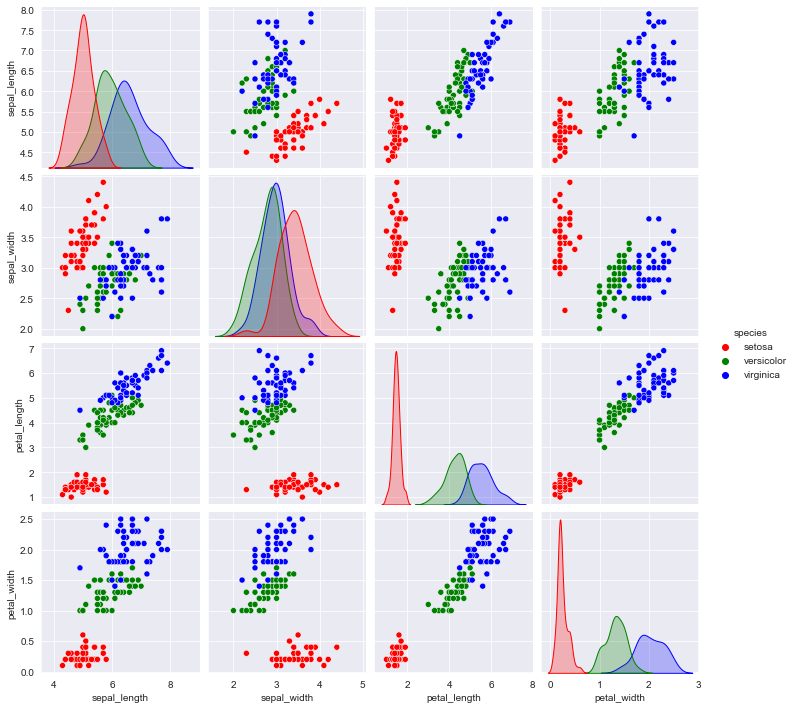

In [10]:
plt.figure(figsize=(12,9))
sns.pairplot(data,hue='species',diag_kind='kde',palette=['red','green','blue'])
plt.show()

#### Numerical and Categorical feartures:

In [6]:
data_num=data.select_dtypes(np.number)
data_cat=data.select_dtypes(object)
print('The numerical features : ')
print(data_num.columns,'\n')
print('The categorical features : ')
print(data_cat.columns)

The numerical features : 
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object') 

The categorical features : 
Index(['species'], dtype='object')


#### Visualisation of Outliers and Distribution of data:

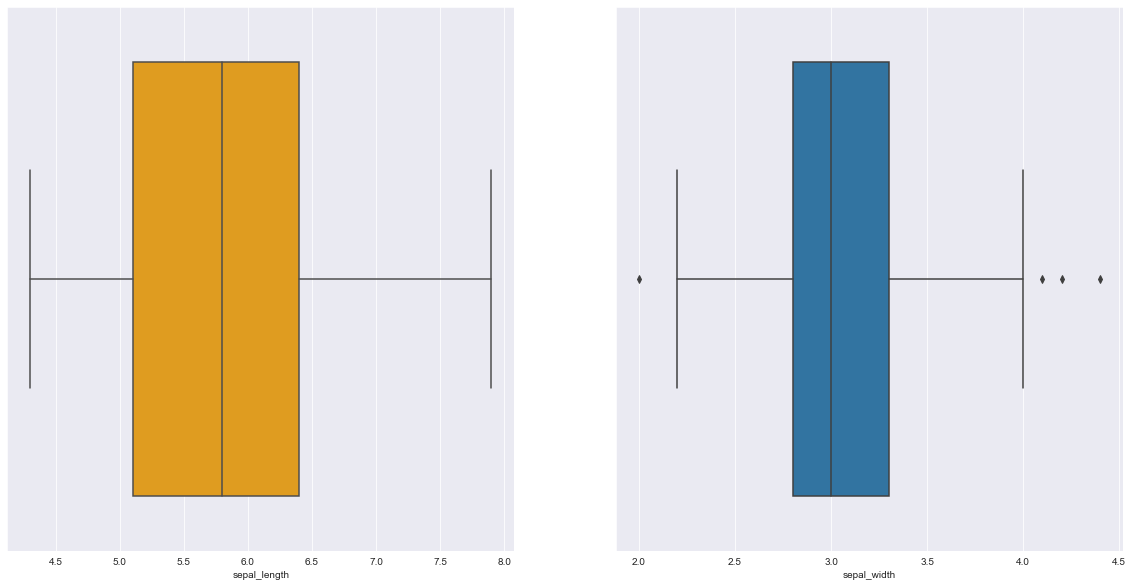

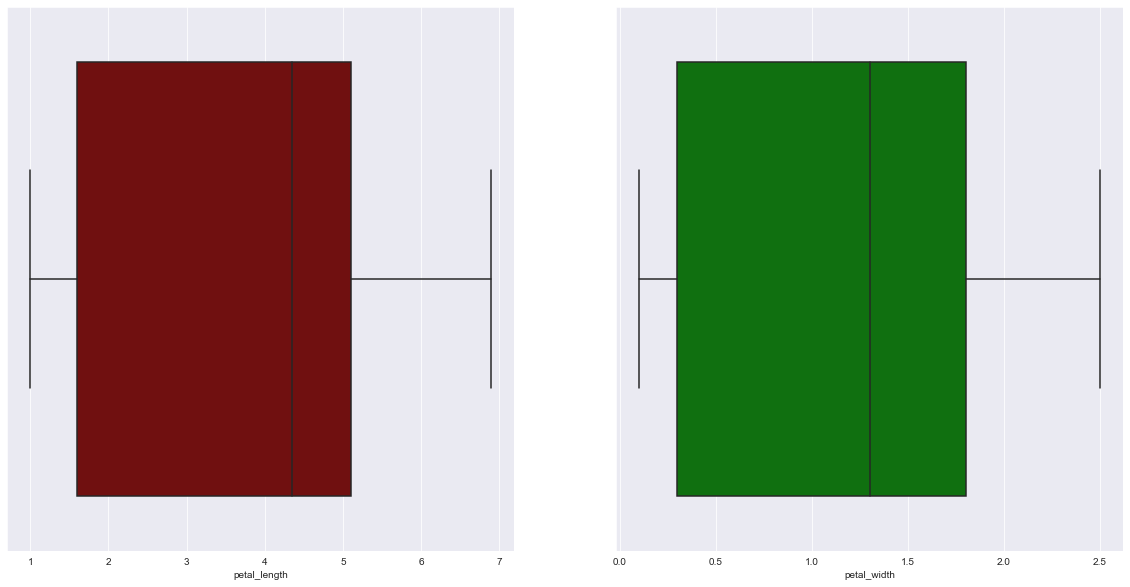



Distribution of data : 


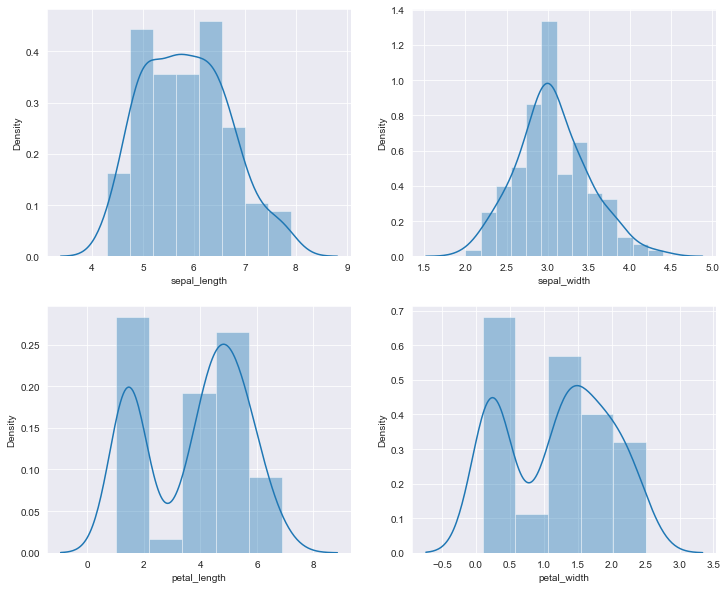

In [9]:
plt.rcParams['figure.figsize']=(20,10)
fig,axes=plt.subplots(1,2)
sns.boxplot(x=data['sepal_length'],ax=axes[0],color='orange')
sns.boxplot(x=data['sepal_width'],ax=axes[1])
plt.show()
fig,axes=plt.subplots(1,2)
sns.boxplot(x=data['petal_length'],ax=axes[0],color='maroon')
sns.boxplot(x=data['petal_width'],ax=axes[1],color='green')
plt.show()
print('\n')
print('Distribution of data : ')
j=1
plt.figure(figsize=(12,10))
for i in data_num:
    plt.subplot(2,2,j)
    sns.distplot(data[i])
    j+=1
plt.show()

* The distribution of the data signifies a near normal distribution.
* No significant effect of outliers is observed from the distribution plots.

#### Bivariate Analysis : Visualisation of Numerical fearures with Target feature(species):

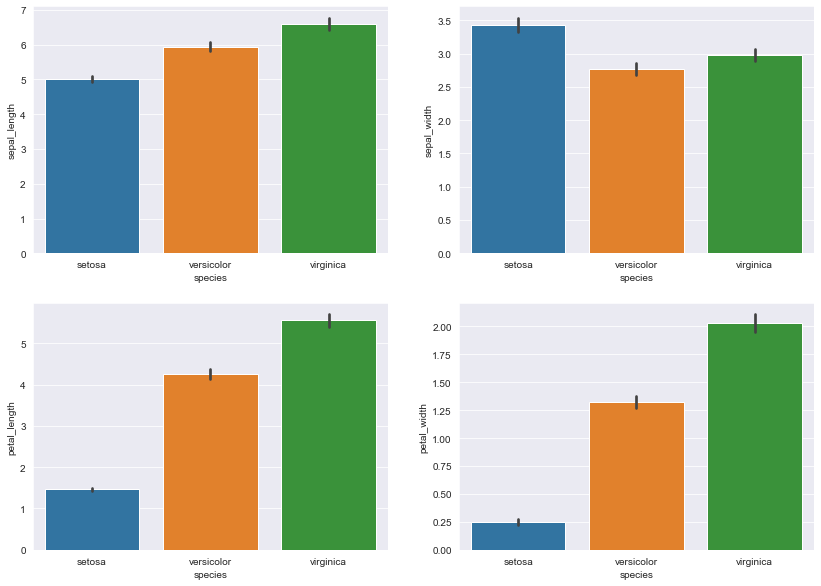

In [8]:
plt.figure(figsize=(14,10))
sns.set_style('darkgrid')
j=1
for column in data_num:
    plt.subplot(2,2,j)
    sns.barplot(x=data['species'],y=data[column],data=data)
    j+=1
plt.show()   

#### Checking the presence of Multicollinearity:

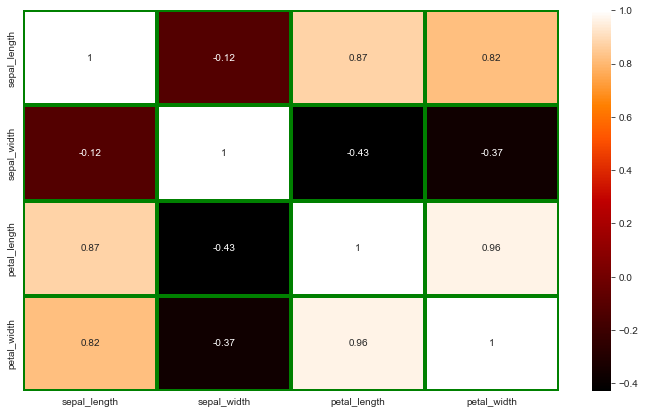

In [11]:
plt.figure(figsize=(12,7))
sns.heatmap(data=data.corr(),annot=True,linecolor='green',linewidth=3.5,cmap='gist_heat')
plt.show()

#### Checking the presence of Imbalance in Target feature(species):

Checking the distribution of data in target feature (species) :  

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64 

Percentage of values in the subclass ``Setosa`` :  33.33333333333333 %
Percentage of values in the subclass ``Versicolor`` :  33.33333333333333 %
Percentage of values in the subclass ``Virginica`` :  33.33333333333333 %




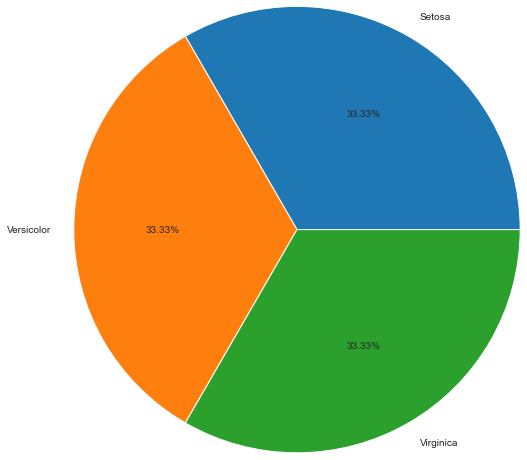

In [12]:
print('Checking the distribution of data in target feature (species) : ','\n')
print(data['species'].value_counts(),'\n')
percent_setosa=(data['species'].value_counts()[0]/data.shape[0])*100
percent_versicolor=(data['species'].value_counts()[1]/data.shape[0])*100
percent_virginica=(data['species'].value_counts()[2]/data.shape[0])*100
print('Percentage of values in the subclass ``Setosa`` : ',percent_setosa,'%')
print('Percentage of values in the subclass ``Versicolor`` : ',percent_versicolor,'%')
print('Percentage of values in the subclass ``Virginica`` : ',percent_virginica,'%')
print('\n')
plt.figure(figsize=(5,7))
plt.pie(data['species'].value_counts(),radius=2,labels=['Setosa','Versicolor','Virginica'],
       autopct='%0.2f%%')
plt.show()

In [13]:
data['species']=data['species'].map({'setosa':0,'versicolor':1,'virginica':2})
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Data Preparation:

In [14]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

#### Splitting the dataset into Train data and Test data in the ratio 80:20

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)
print('Checking the shape of the train and test set : ')
print('X_train : ',X_train.shape)
print('X_test : ',X_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

Checking the shape of the train and test set : 
X_train :  (120, 4)
X_test :  (30, 4)
y_train :  (120,)
y_test :  (30,)


#### Training the Decision Tree Classifier:

In [28]:
dtree=DecisionTreeClassifier()
dtree_model=dtree.fit(X_train,y_train)
print(dtree_model)
print('Training has been completed.')
y_pred_train=dtree_model.predict(X_train)
y_pred_train_prob=dtree_model.predict_proba(X_train)[:,1]
y_pred_test=dtree_model.predict(X_test)
y_pred_test_prob=dtree_model.predict_proba(X_test)[:,1]

DecisionTreeClassifier()
Training has been completed.


#### Model Evaluation:

#### Accuracy:

In [29]:
dt_accuracy_train=accuracy_score(y_train,y_pred_train)
print('Accuracy of train data : ',dt_accuracy_train,'\n')
dt_accuracy_test=accuracy_score(y_test,y_pred_test)
print('Accuracy of test data : ',dt_accuracy_test)

Accuracy of train data :  1.0 

Accuracy of test data :  0.9666666666666667


#### Classification Report:


In [30]:
report_train=classification_report(y_train,y_pred_train)
print(report_train,'\n')
report_test=classification_report(y_test,y_pred_test)
print(report_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120
 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Visualisation of the Decision Tree.

[Text(274.7076923076923, 706.68, 'X[2] <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(206.03076923076924, 597.96, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(343.38461538461536, 597.96, 'X[2] <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(137.35384615384615, 489.23999999999995, 'X[3] <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(68.67692307692307, 380.52, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(206.03076923076924, 380.52, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(549.4153846153846, 489.23999999999995, 'X[3] <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(343.38461538461536, 380.52, 'X[1] <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(274.7076923076923, 271.79999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(412.0615384615385, 271.79999999999995, 'X[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(343.38461538461536, 163.0799999

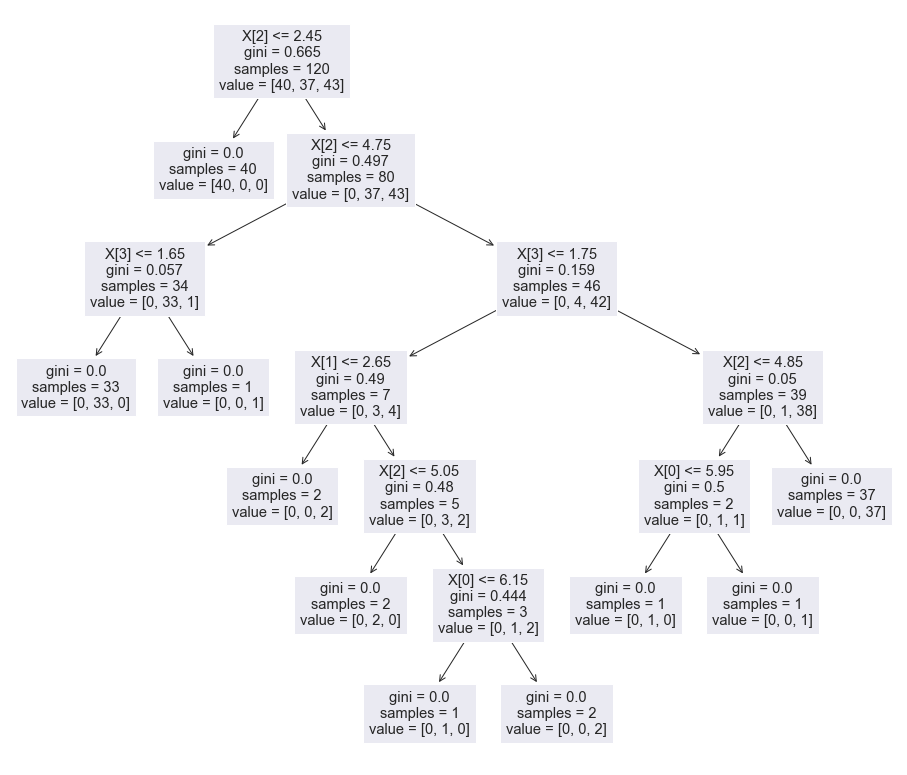

In [31]:
plt.figure(figsize=(16,14))
tree.plot_tree(dtree_model)